<a href="https://colab.research.google.com/github/SuryaKumar6599/DSA/blob/master/9_3sum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the classic 3Sum problem. The optimal and expected approach is sorting + two pointers, which runs in O(n²) time and avoids duplicate triplets.

⸻

✅ Key Idea (Efficient Strategy)
	1.	Sort the array
	•	Helps use two pointers and skip duplicates easily.
	2.	Fix one number (i)
	•	For each nums[i], try to find two numbers to the right whose sum is -nums[i].
	3.	Two-pointer search
	•	left = i + 1, right = n - 1
	•	Move pointers based on the sum:
	•	If sum = 0 → record triplet
	•	If sum < 0 → move left
	•	If sum > 0 → move right
	4.	Skip duplicates
	•	Skip duplicate values for i, left, and right to ensure unique triplets.

⸻

🧠 Why This Works
	•	Sorting ensures order and makes duplicate handling easy
	•	Two pointers reduce a 3-loop brute force (O(n³)) to O(n²)
	•	Constraints (n ≤ 3000) are safe for O(n²)

⸻

🧪 Example

Input:

[-1,0,1,2,-1,-4]

Sorted:

[-4,-1,-1,0,1,2]

Output:

[[-1,-1,2],[-1,0,1]]


⸻

🧩 Python Implementation

from typing import List

class Solution:
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        nums.sort()
        res = []
        n = len(nums)

        for i in range(n - 2):
            # Skip duplicate fixed elements
            if i > 0 and nums[i] == nums[i - 1]:
                continue

            left, right = i + 1, n - 1

            while left < right:
                total = nums[i] + nums[left] + nums[right]

                if total == 0:
                    res.append([nums[i], nums[left], nums[right]])

                    # Skip duplicates for left and right
                    while left < right and nums[left] == nums[left + 1]:
                        left += 1
                    while left < right and nums[right] == nums[right - 1]:
                        right -= 1

                    left += 1
                    right -= 1

                elif total < 0:
                    left += 1
                else:
                    right -= 1

        return res


⸻

⏱️ Complexity Analysis
	•	Time: O(n²)
	•	Space: O(1) (excluding output list)

⸻

🔑 Edge Cases Covered
	•	All zeros → [[0,0,0]]
	•	No valid triplets → []
	•	Duplicate numbers handled correctly

If you want, I can also explain this with step-by-step pointer movement, or convert it to Java / C++, or give a dry run for interviews.


Below is a visual + step-by-step explanation of the 3Sum (two-pointer) approach using your example.
Think of this as how you’d explain it on a whiteboard in an interview.

⸻

🔹 Step 1: Sort the array

Input:

[-1, 0, 1, 2, -1, -4]

Sorted:

[-4, -1, -1, 0, 1, 2]
  ↑
  i

We fix one element (i) and find two numbers on the right that sum to -nums[i].

⸻

🔹 Step 2: Fix i and use Two Pointers

Case 1️⃣: i = 0 → nums[i] = -4

Target = +4

[-4, -1, -1, 0, 1, 2]
  i    L              R

Left		Right	Sum
-1		2		-3
move L 	→
-1		2		-3
move L 	→
0		2		-2
move L 	→
1		2		-1

❌ No valid triplet → move i

⸻

Case 2️⃣: i = 1 → nums[i] = -1

Target = +1

[-4, -1, -1, 0, 1, 2]
      i    L         R

Left		Right	Sum
-1		2		0 ✅

✔ Triplet found:

[-1, -1, 2]

Move both pointers (and skip duplicates):

[-4, -1, -1, 0, 1, 2]
      i         L   R

Left		Right	Sum
0		1		0 ✅

✔ Triplet found:

[-1, 0, 1]


⸻

Case 3️⃣: i = 2 → nums[i] = -1 (duplicate)

⏭ Skip to avoid duplicate triplets

⸻

Case 4️⃣: i = 3 → nums[i] = 0

Target = 0

[-4, -1, -1, 0, 1, 2]
            i   L   R

Left		Right	Sum
1		2		3
move R ←

❌ No valid triplet

⸻

✅ Final Result

[[-1, -1, 2],
 [-1, 0, 1]]


⸻

🔹 Visual Pointer Movement Summary

Sorted nums = [-4, -1, -1, 0, 1, 2]

Fix i
   |
   v
[i] [L]        [R]
     →      ←

	•	Sum too small → move L right
	•	Sum too large → move R left
	•	Sum = 0 → record & skip duplicates

⸻

🧠 Why This Is Optimal

Approach			Time
Brute Force (3 loops)	O(n³) ❌
Sort + Two Pointers	O(n²) ✅


⸻

🎯 Interview Tip (One-liner)

“Sort the array, fix one number, and solve 2-Sum using two pointers while skipping duplicates.”

⸻



In [1]:
pip install matplotlib

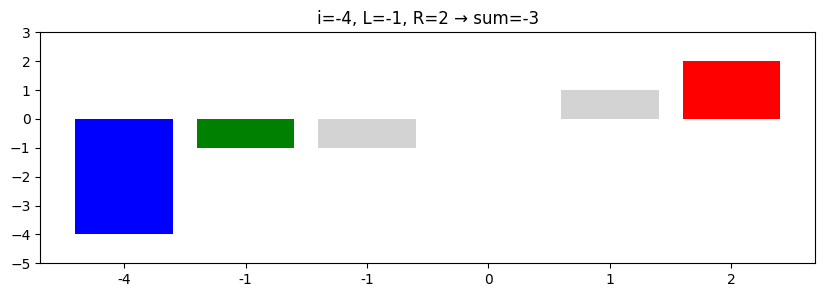

In [2]:
import matplotlib.pyplot as plt
import time

def visualize_three_sum(nums):
    nums = sorted(nums)
    n = len(nums)

    fig, ax = plt.subplots(figsize=(10, 3))

    def draw(i, left, right, msg):
        ax.clear()
        colors = []

        for idx in range(n):
            if idx == i:
                colors.append("blue")      # fixed index
            elif idx == left:
                colors.append("green")     # left pointer
            elif idx == right:
                colors.append("red")       # right pointer
            else:
                colors.append("lightgray")

        ax.bar(range(n), nums, color=colors)
        ax.set_xticks(range(n))
        ax.set_xticklabels(nums)
        ax.set_title(msg)
        ax.set_ylim(min(nums) - 1, max(nums) + 1)
        plt.pause(0.8)

    for i in range(n - 2):
        if i > 0 and nums[i] == nums[i - 1]:
            continue

        left, right = i + 1, n - 1

        while left < right:
            total = nums[i] + nums[left] + nums[right]

            draw(
                i, left, right,
                f"i={nums[i]}, L={nums[left]}, R={nums[right]} → sum={total}"
            )

            if total == 0:
                draw(i, left, right, "🎯 Triplet Found!")
                left += 1
                right -= 1

            elif total < 0:
                left += 1
            else:
                right -= 1

    plt.show()


# Run visualization
visualize_three_sum([-1, 0, 1, 2, -1, -4])

Given an integer array nums, return all the triplets [nums[i], nums[j], nums[k]] such that i != j, i != k, and j != k, and nums[i] + nums[j] + nums[k] == 0.

Notice that the solution set must not contain duplicate triplets.



Example 1:

Input: nums = [-1,0,1,2,-1,-4]
Output: [[-1,-1,2],[-1,0,1]]
Explanation:
nums[0] + nums[1] + nums[2] = (-1) + 0 + 1 = 0.
nums[1] + nums[2] + nums[4] = 0 + 1 + (-1) = 0.
nums[0] + nums[3] + nums[4] = (-1) + 2 + (-1) = 0.
The distinct triplets are [-1,0,1] and [-1,-1,2].
Notice that the order of the output and the order of the triplets does not matter.
Example 2:

Input: nums = [0,1,1]
Output: []
Explanation: The only possible triplet does not sum up to 0.
Example 3:

Input: nums = [0,0,0]
Output: [[0,0,0]]
Explanation: The only possible triplet sums up to 0.


Constraints:

3 <= nums.length <= 3000
-105 <= nums[i] <= 105

In [4]:
#from typing import List
class Solution:
    def threeSum(self, nums):
        nums.sort()
        res = []
        n = len(nums)
        for i in range(n - 2):
            if i > 0 and nums[i] == nums[i - 1]:
                continue
            left, right = i + 1, n - 1
            while left < right:
                total = nums[i] + nums[left] + nums[right]
                if total == 0:
                    res.append([nums[i], nums[left], nums[right]])
                    while left < right and nums[left] == nums[left + 1]:
                        left += 1
                    while left < right and nums[right] == nums[right - 1]:
                        right -= 1
                    left += 1
                    right -= 1
                elif total < 0:
                    left += 1
                else:
                    right -= 1
        return res